In [69]:
from google.colab import files
uploaded = files.upload()

Saving stroke.csv to stroke (1).csv


In [70]:
import pandas as pd
df=pd.read_csv("stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [71]:
x=df.iloc[:,2].values
y=df.iloc[:,11].values

In [72]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x.reshape(-1,1),y)

In [73]:
x.shape

(9722, 1)

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
#Decision tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
pred=classifier.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8359897172236503

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[756, 217],
       [102, 870]])

In [79]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       973
           1       0.80      0.90      0.85       972

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945



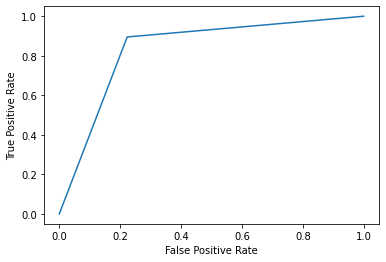

In [80]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

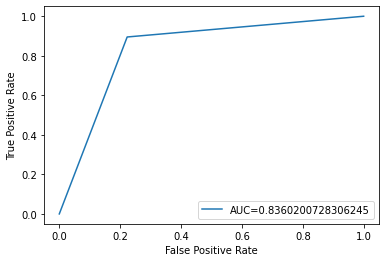

In [81]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

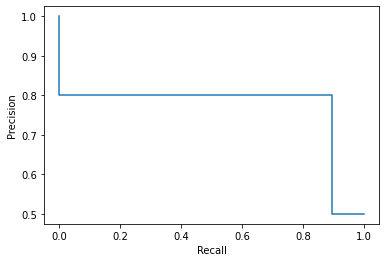

In [82]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [83]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
pred=classifier.predict(x_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8226221079691517

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[728, 245],
       [100, 872]])

In [87]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       973
           1       0.78      0.90      0.83       972

    accuracy                           0.82      1945
   macro avg       0.83      0.82      0.82      1945
weighted avg       0.83      0.82      0.82      1945



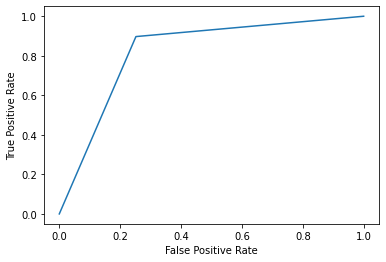

In [88]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

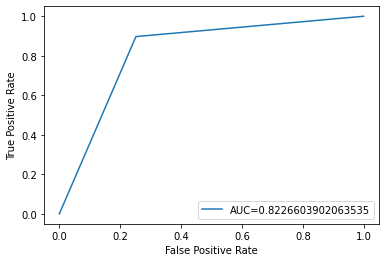

In [89]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

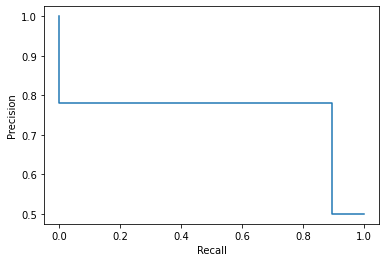

In [90]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [91]:
#svm
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [92]:
pred=classifier.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7634961439588689

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[658, 315],
       [145, 827]])

In [95]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       973
           1       0.72      0.85      0.78       972

    accuracy                           0.76      1945
   macro avg       0.77      0.76      0.76      1945
weighted avg       0.77      0.76      0.76      1945



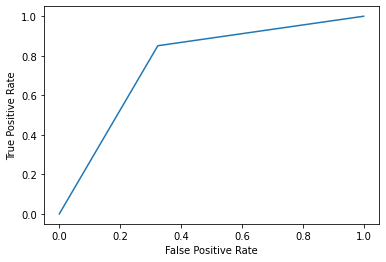

In [96]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

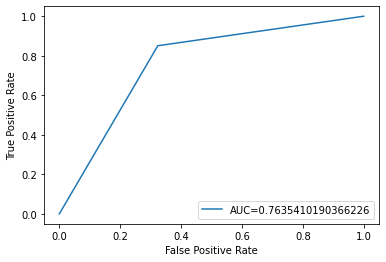

In [97]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

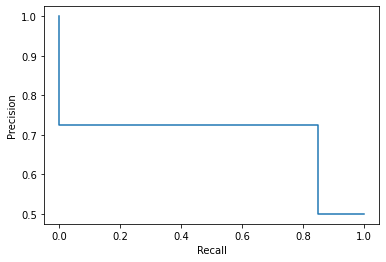

In [98]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [99]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [100]:
pred=classifier.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.834961439588689

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[749, 224],
       [ 97, 875]])

In [103]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       973
           1       0.80      0.90      0.85       972

    accuracy                           0.83      1945
   macro avg       0.84      0.83      0.83      1945
weighted avg       0.84      0.83      0.83      1945



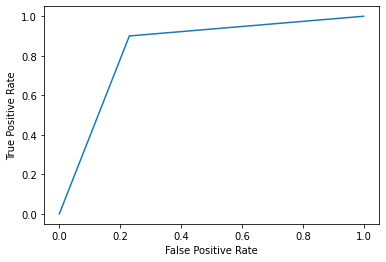

In [104]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

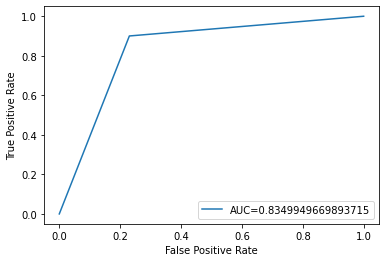

In [105]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

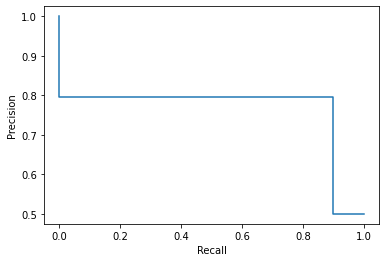

In [106]:

precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [107]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  

LogisticRegression()

In [108]:
pred=classifier.predict(x_test)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7460154241645244

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[715, 258],
       [236, 736]])

In [111]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       973
           1       0.74      0.76      0.75       972

    accuracy                           0.75      1945
   macro avg       0.75      0.75      0.75      1945
weighted avg       0.75      0.75      0.75      1945



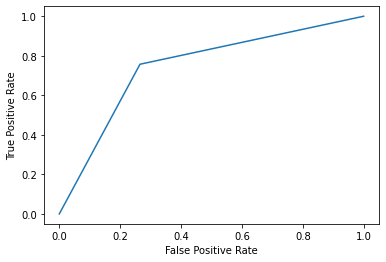

In [112]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

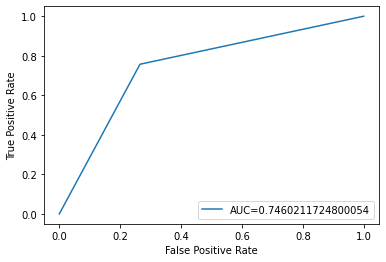

In [113]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

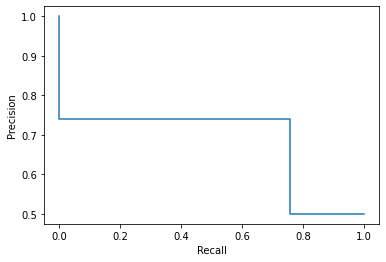

In [114]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [115]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [116]:
pred=classifier.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7634961439588689

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[658, 315],
       [145, 827]])

In [119]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       973
           1       0.72      0.85      0.78       972

    accuracy                           0.76      1945
   macro avg       0.77      0.76      0.76      1945
weighted avg       0.77      0.76      0.76      1945



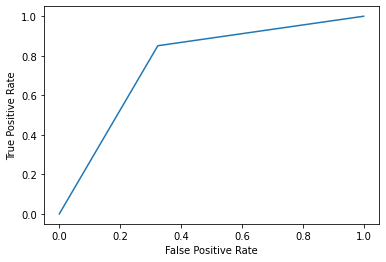

In [120]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

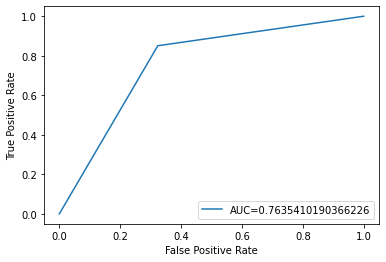

In [121]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

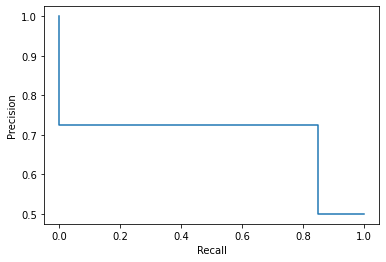

In [122]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [123]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
#fuzzy
from fcmeans import FCM
classifier = FCM(n_clusters=2)
classifier.fit(x)

In [125]:
pred=classifier.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.748586118251928

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[563, 410],
       [ 79, 893]])

In [128]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70       973
           1       0.69      0.92      0.79       972

    accuracy                           0.75      1945
   macro avg       0.78      0.75      0.74      1945
weighted avg       0.78      0.75      0.74      1945



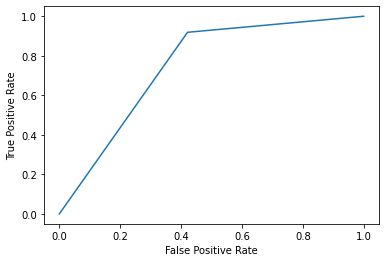

In [129]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

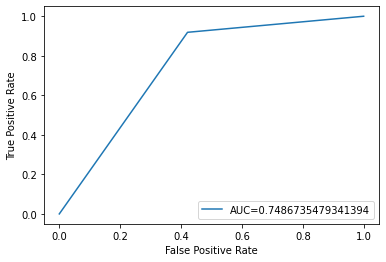

In [130]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

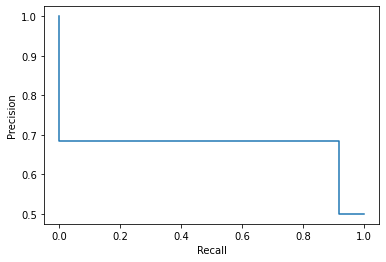

In [131]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [132]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = tree.DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['rf']=RandomForestClassifier()
  models['stacking'] = new_stacking()
  return models

In [133]:
from sklearn.ensemble import StackingClassifier
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', tree.DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('rf',RandomForestClassifier() ))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
  return model

In [134]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

>lr 0.7556 (0.0195)
>knn 0.7936 (0.0229)
>dt 0.8343 (0.0153)
>svm 0.7668 (0.0178)
>bayes 0.7615 (0.0176)
>rf 0.8342 (0.0151)
>stacking 0.8347 (0.0151)


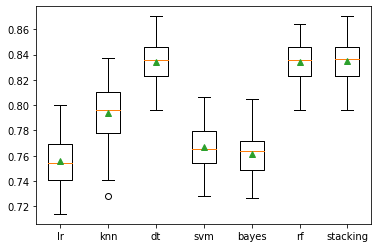

In [135]:
from numpy import mean
from numpy import std
X=x
Y=y
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [136]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [137]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [138]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [139]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [140]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [141]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
244/244 [==============================] - 2s 3ms/step - loss: 0.9602 - accuracy: 0.5102
Epoch 2/50
244/244 [==============================] - 1s 4ms/step - loss: 0.6141 - accuracy: 0.6928
Epoch 3/50
244/244 [==============================] - 1s 4ms/step - loss: 0.5600 - accuracy: 0.7468
Epoch 4/50
244/244 [==============================] - 1s 6ms/step - loss: 0.5274 - accuracy: 0.7527
Epoch 5/50
244/244 [==============================] - 1s 4ms/step - loss: 0.5112 - accuracy: 0.7561
Epoch 6/50
244/244 [==============================] - 1s 4ms/step - loss: 0.5023 - accuracy: 0.7540
Epoch 7/50
244/244 [==============================] - 1s 4ms/step - loss: 0.4977 - accuracy: 0.7558
Epoch 8/50
244/244 [==============================] - 1s 5ms/step - loss: 0.4955 - accuracy: 0.7583
Epoch 9/50
244/244 [==============================] - 1s 5ms/step - loss: 0.4941 - accuracy: 0.7553
Epoch 10/50
244/244 [==============================] - 1s 5ms/step - loss: 0.4903 - accuracy: 0.7535

In [142]:
y_pred = ann.predict(x_test)

61/61 [==============================] - 0s 2ms/step


In [143]:
y_pred = (y_pred > 0.5)

In [144]:
import numpy as np
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[609, 364],
       [117, 855]])

In [146]:
accuracy_score(y_test, y_pred)

0.7526992287917738

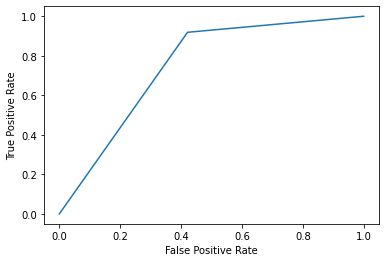

In [147]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

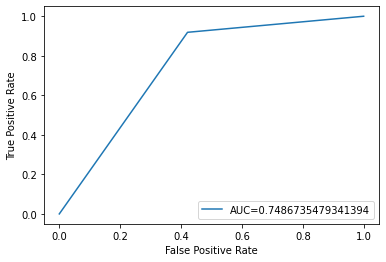

In [148]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

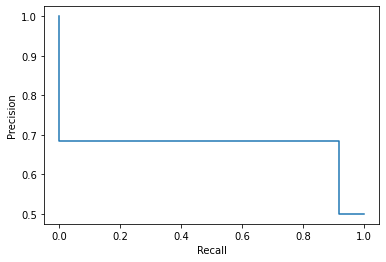

In [149]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()